In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

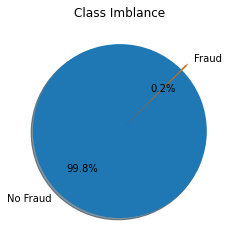

In [23]:
fig, ax = plt.subplots()
fig.set_facecolor('white')
plt.pie(df.Class.value_counts(), explode=(0,0.1), shadow=True, autopct="%1.1f%%", startangle=45, labels=['No Fraud', 'Fraud'])
plt.title('Class Imblance')
plt.show()

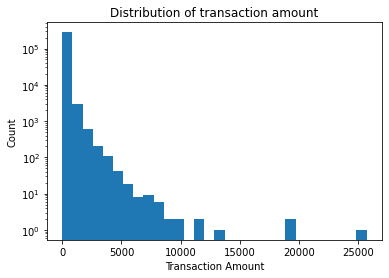

In [27]:
plt.hist(df.Amount, log=True, bins=30)
plt.xlabel('Transaction Amount')
plt.title('Distribution of transaction amount')
plt.show()

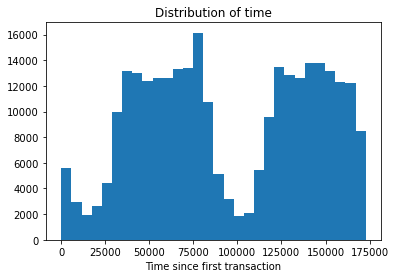

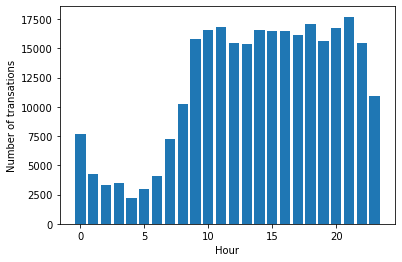

In [33]:
plt.hist(df.Time, bins=30)
plt.xlabel('Time since first transaction')
plt.title('Distribution of time')
plt.show()

df.Hour = (df.Time//3600).apply(lambda x: x if x < 24 else x - 24)
hours = df.Hour.value_counts()
plt.bar(hours.index, hours.values)
plt.xlabel('Hour')
plt.ylabel('Number of transations')
plt.show()

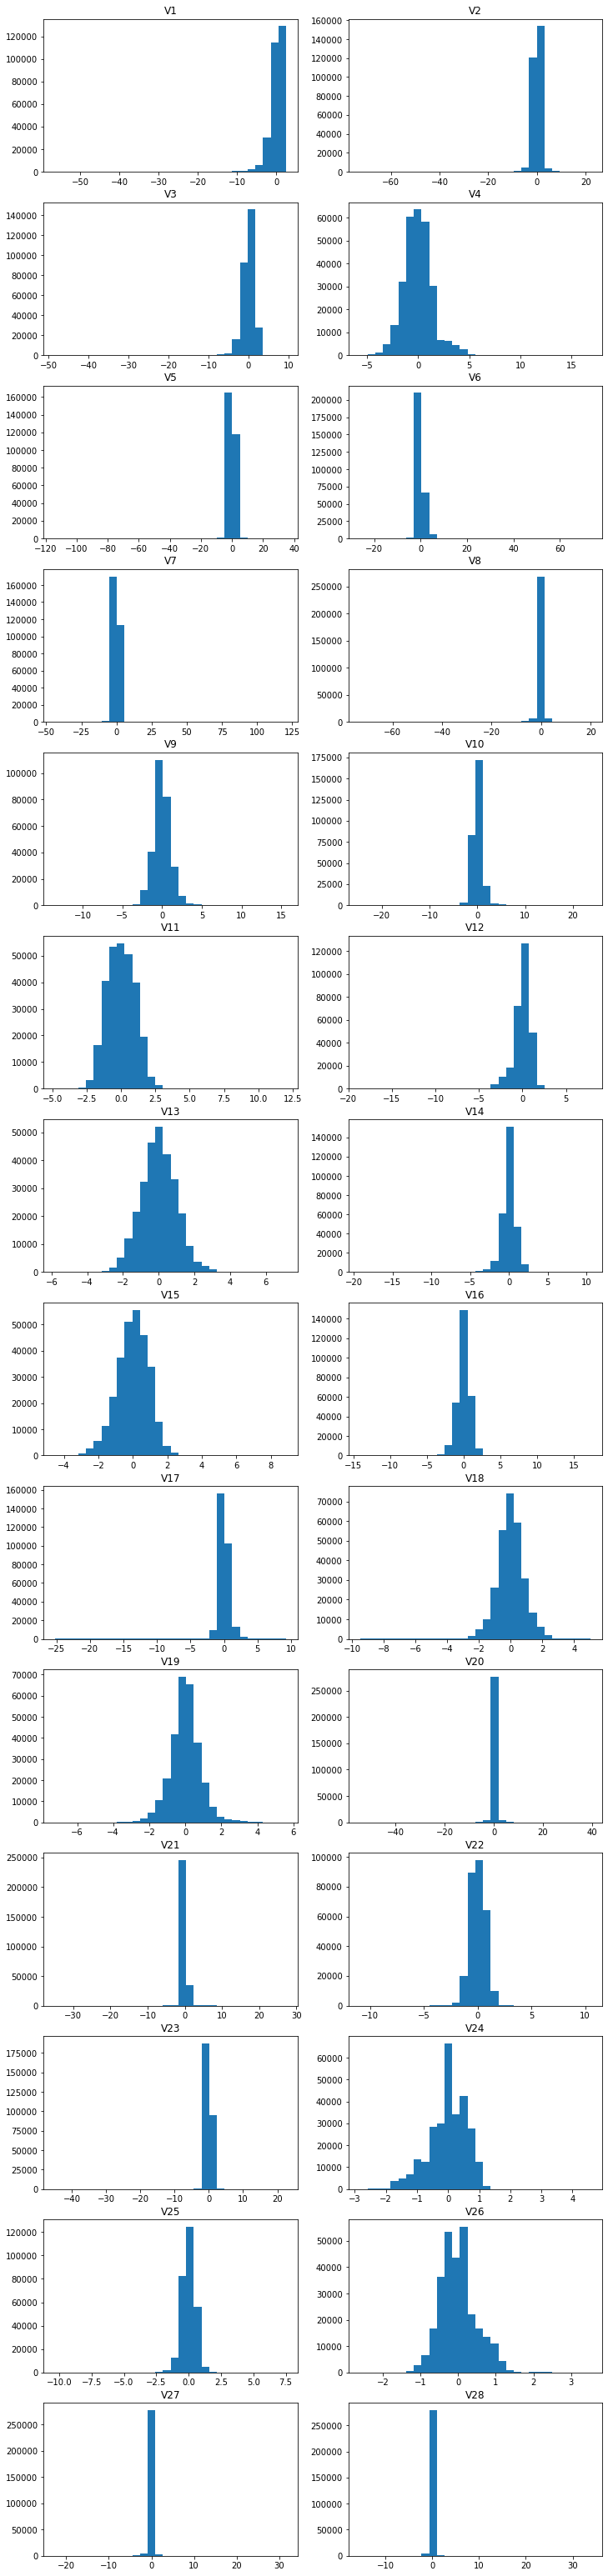

In [35]:
num_features = [col for col in df.columns if col.find('V') > -1]

n_cols = 2
n_rows = 14

fig = plt.gcf()
fig.set_size_inches(n_cols * 6, n_rows * 4)

for pos, feature in enumerate(num_features):
    sp = plt.subplot(n_rows, n_cols, pos + 1)
    plt.hist(df[feature], bins=30)
    plt.title(feature)

plt.show()

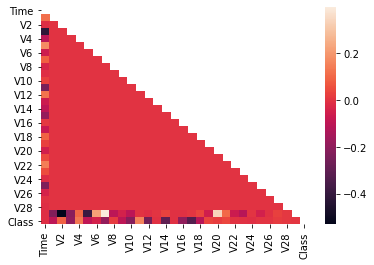

In [38]:
cm = df.corr()
mask = np.triu(cm)
fig, ax = plt.subplots()
sns.heatmap(cm, mask=mask)
plt.show()

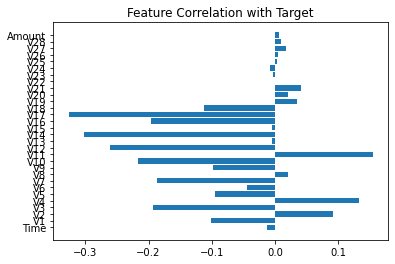

In [40]:
idx = [col for col in df.columns if col != 'Class']
plt.barh(cm.loc[idx, 'Class'].index, cm.loc[idx, 'Class'].values)
plt.title('Feature Correlation with Target')
plt.show()

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC

In [43]:
model_gausnb = make_pipeline(RobustScaler(), GaussianNB())
model_aboost = AdaBoostClassifier()
model_svc = make_pipeline(RobustScaler(), SVC())

models = [
    ('Gaussian Naive Bayes', model_gausnb),
    ('Ada boost', model_aboost),
    ('SVC', model_svc),
]

In [44]:
x = df.drop(['Class'], axis=1)
y = df.Class

In [49]:
for name, model in models:
    scores = cross_val_score(model, x, y, scoring='roc_auc')
    print(f'{name} model average AUC score: {np.mean(scores)}')

Gaussian Naive Bayes model average AUC score: 0.9610305094742628
Ada boost model average AUC score: 0.9715202223089602
SVC model average AUC score: 0.9369809018455767


In [ ]:
params = {
    'gaussiannb__var_smoothing': [0.001, 0.1, 0.5, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
}

In [ ]:
kf = StratifiedKFold(3, shuffle=True, random_state=123)
grid = GridSearchCV(model_gausnb, params, cv=kf, scoring='roc_auc',n_jobs=-1, refit=True)